# Liens entre deux variables qualitatives 

<div style="border:1px solid black; padding:10px; background-color: #F8F8F8;">
    <strong> <b>Notions et fonctions</b></strong><br>.
    <i> Les notions et procédures apparaissant pour la première fois dans le cours sont suivies d'un astérisque
    <ul>
       <li> chi2  *</li>
        <li> Corrélation entre deux variables quali</li>
        <li> heatmap *</li>
        <li> Test exact de Fisher</li>
    </ul>
    <strong> Comme d'habitude certaines cellules sont dépendantes de cellules précédentes. Il faut donc les éxécuter en suivant leur ordre dans la page</strong> 
</div>



<b>révisions</b>
<ul>
    <li></li>

La question que pose généralement l'historien est celle des relations entre deux ou plusieurs variables. </br>
Cela suppose de suivre des opérations différents selon le type de variable que l'on examine. </br>
Dans le cas de deux variables qualitivatives il s'agit d'examiner la distribution des invidius entre les paires de modalités définies par le croisement des deux variables. </br>
Nous examinons d'abord la table de contingence, pouvons également visualiser cette distribution. </br>
Nous utilisons ici un jeu de données qui décrit les passagers du Titanic décrits par plusieurs caractéristiquqs (âge, sexe) mais aussi leur statut à bord du bateau (classe, prix payé) ainsi que par le fait qu'ils aient ou non survécus au naufrage. 

In [3]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt

In [19]:

# Chargement des données
df = pd.read_csv('Doc8/train.csv')

# Affichage des premières lignes pour vérification
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


La table de contingence, souvent nommé tableau croisée donne pour chaque paire possible définie par le croisement de deux variables le nombre d'invidus possédant simultanément ces deux propriétés. Il sert souvent de base au calcul d'un tableau de pourcentage, à la lecture souvent plus aisée pour nous habitués à la base 100. </br>
Celui-ci n'a généralement pas beaucoup de sens pour de petites populations. Nous pouvons même considérer qu'il est curieux de l'utiliser pour décrire des popuations dont les effectifs sont inférieurs à 100. 

In [4]:
# Création de la table de contingence
table_contingence = pd.crosstab(df['Survived'], df['Sex'])
print(table_contingence)


Sex       female  male
Survived              
0             81   468
1            233   109


Les écarts sont ici importants, le taux de survie des passagers du Titanic diffère grandement selon le sexe, il semble qu'en ce cas précis le vieux cri des naufragés, les femmes et les enfants d'abord ait été suivi d'effet. <br>
Le calcul des tableaux de pourcntages va nous permettre de préciser cela. 

In [5]:
# Calcul des pourcentages par ligne
pourcentages_par_ligne = table_contingence.div(table_contingence.sum(axis=1), axis=0) * 100
print("Pourcentages par ligne :")
print(pourcentages_par_ligne)

Pourcentages par ligne :
Sex          female       male
Survived                      
0         14.754098  85.245902
1         68.128655  31.871345


Les différents tableaux de poourcentage donnent forme à des informations différents. La base 100 correspond ici au total des lignes. Nous lisons donc que parmi les morts se trouvent 15% de femmes et 85% d'hommes. A l'inverse 68% des survivants sont des femmes.

In [6]:
# Calcul des pourcentages par colonne
pourcentages_par_colonne = table_contingence.div(table_contingence.sum(axis=0), axis=1) * 100
print("Pourcentages par colonne :")
print(pourcentages_par_colonne)


Pourcentages par colonne :
Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815


Nous constatons que les valeurs des deux tableaux ne sont pas identiques, puisque déterminées en partie par les totaux en ligne et en colonne. </br>
75 % des femmes ont survécu, ce n'est le cas que de 18% des hommes.  </br>
Les écarts sont ici si importants que, la population étant importanes il n'y a guère de doute sur l'existence d'un lien statisitque entre les deux variables. Nous allons cependant le vérifier par souci de méthode. 

In [7]:
# Calcul des pourcentages sur l'ensemble du tableau
total_general = table_contingence.sum().sum()
pourcentages_total = table_contingence / total_general * 100
print("Pourcentages sur l'ensemble du tableau :")
print(pourcentages_total)


Pourcentages sur l'ensemble du tableau :
Sex          female       male
Survived                      
0          9.090909  52.525253
1         26.150393  12.233446


Le tableau calculant des pourcentages relatifs à la population totale a ici assez peu d'intérêt, il permet simplement de comprendre plus aisément les écarts entre les deux tableaux précédents. Les hommes sont bien plus nombreux sur le Titanic que les femmes. </br>


In [9]:
df['Survived'] = df['Survived'].astype(str)
# Nous transformons les valeurs de la variable qui est stockée en 1/0 en chaînes de caractères


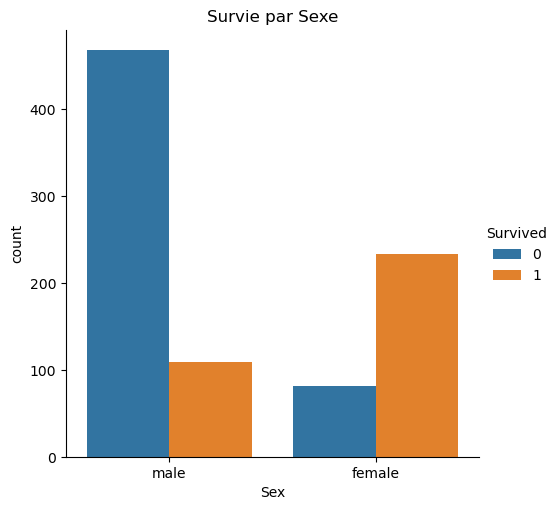

In [10]:
# Visualisation avec Seaborn
sns.catplot(x='Sex', hue='Survived', kind='count', data=df)
plt.title('Survie par Sexe')
plt.show()


Le diagramme en bâton, qui a l'avantage de la simplicité, les hauteurs étant ici proporitionnelles aux effectifs, offre l'avantage d'une visualisation rapide non seulement des attractions entre modalités des variables, mais aussi des effectifs des modalités de chaque variable. Il montre ici ainsi à la fois le plus grand nombre d'hommes à bord du navire mais également le fait que le taux de survie des deux population est très différent. 

La heatmap est aujourd'hui très populaire, elle est cependant sans doute plus utile lorsque l'on a à faire à des variables aux modalités plus nombreuses. 

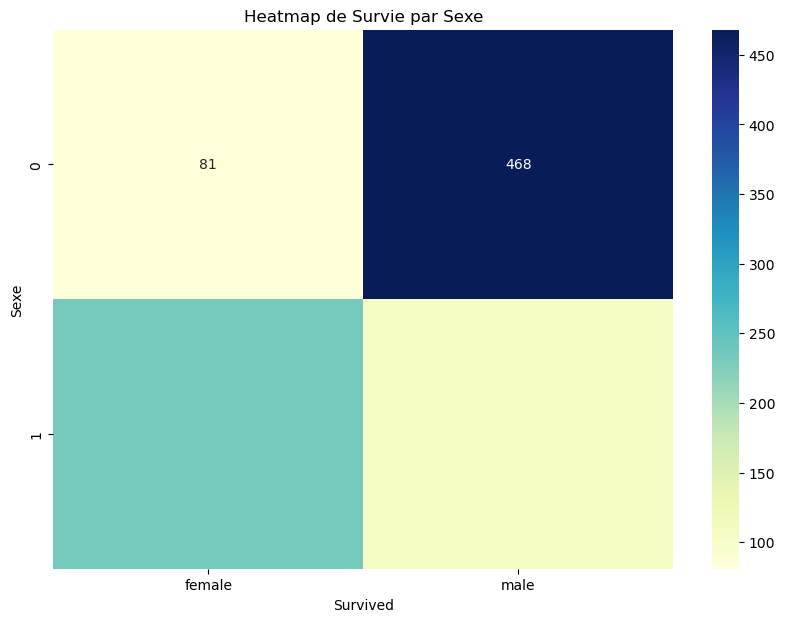

In [11]:
# Création de la heatmap
plt.figure(figsize=(10, 7))  # Ajustez la taille selon vos besoins
sns.heatmap(table_contingence, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap de Survie par Sexe')
plt.ylabel('Sexe')
plt.xlabel('Survived')
plt.show()


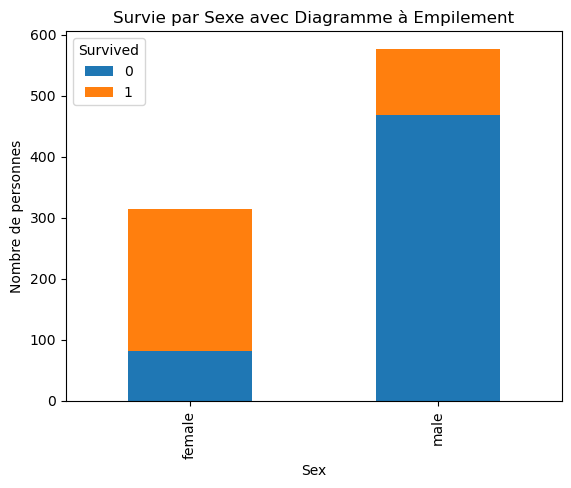

In [12]:
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Survie par Sexe avec Diagramme à Empilement')
plt.ylabel('Nombre de personnes')
plt.show()


Les diagrammes empilés offrent l'avantage eux aussi de permettre de visualiser sur un même graphique un plus grand nombre de modalités. La lecture directe des effectifs correspondant à chaque paire de modalité est cependant moins aisé, les rectanbles n'ayant pas même base. Il est bien sur possible de les reconstituer en usant de l'échelle, mais cela imopse un effort supplémentaire au lecteur.

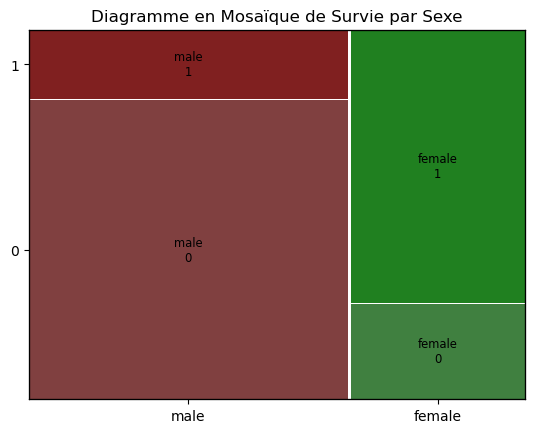

In [14]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Sex', 'Survived'])
plt.title('Diagramme en Mosaïque de Survie par Sexe')
plt.show()


Le diagramme en mosaïque attire lui l'attention du lecteur sur les proportions, donnant le poid de chaque groupe défini par un couple de modalités. Il est parlant dans le cas du croisement (assez rare) de deux variables comptant chacune deux modalités. 

Le constat d'un lien entre deux variables n'a de sens que s'il est validé par un test mesurant l'intensité de la relation entre celles-ci. </br>
Il existe une multitude de tests adapté chacun à des contextes d'usage spécifiques </br>
Dans le cas de deux variables qualititatives, le plus usuel est le chi2 qui mesure la distance entre une distribution attendue si les deux variables étaient indépendantes. 

In [15]:
chi2, p, dof, expected = stats.chi2_contingency(table_contingence)

print(f"Chi carré: {chi2}")
print(f"P-value: {p}")
print(f"Degrés de liberté: {dof}")
print("Effectifs attendus:")
print(expected)


Chi carré: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrés de liberté: 1
Effectifs attendus:
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


<ul>
    <li>Le chi2 lui même mesure l'écart entre distribution attendue en cas d'indépendance et distribution observée </li>
    <li> La p value indique la probabilité d'observer une telle distirbution en cas d'indépendance entre les deux variables. On considère en sciencs sociales qu'un risque de 5 (voire 10) % est acceptable (soit une valeur inférieur à resp 0.1 et 0.05. Nous en sommes ici fort loin. Attetnion les valeurs sont données en notation scientifique.  Dans cette notation, e est une abréviation de "exponent", qui représente "fois dix puissance", donc le nombre peut être interprété comme 0.000000000000000000000000000000000000000000000000000000000011973570627755645, ce qui représente la probabilité (modeste) d'une indépendance des deux variables. </li>
    <li>Les degrés de libertés sont une fonction de la taille de la table de contingence</li>
    <li>La table des effectifs attendus montre les nombres que l'on s'attendrait à observer dans chaque cellule de la table de contingence si les deux variables étaient indépendantes </li>

</ul>

Le choix du test dépend de la nature des variables, mais aussi d'autres paramètres, en particulier les effectis concernés. On considère généralement qu'il faut pour pouvoir utiliser de manière pertinente le chi2 que les effectifs attendus soient dans chaque case du tableau >5. </br>
Cela signifie qu'utiliser ce test pour de petites populations ou bien des couples de modalités aux effectifs attendus très faible n'a aucun intérêt et aucun sens.</br>
Dans certains domaines le cas se produit (études cliniques en particulier), on préférera alors d'autres tests, dont le plus connu est le test exact de Fisher. Attention là aussi il faut pour utiiser celui-ci que les données le permettent. Le test de Fisher est généralement utilisé dans le cas de tableaux 2x2 (ce n'est pas une obligation mais il est souvent peu utiles lorsque ce n'est pas le cas). Considéré par certains auteurs comme exagèrement prudent, le test de Fisher ne réagit que lorsque le lien entre les deux variables est particulièrement fort, il suppose donc des écarts importants entre le tableau attendu sous l'hypothèse d'indépéndance et les effectifs observés. 

In [18]:
from scipy.stats import fisher_exact

# Votre tableau de contingence est déjà défini sous le nom table_contingence
# Assurez-vous que table_contingence est un tableau 2x2


# Utilisation du test exact de Fisher
odds_ratio, p_value = fisher_exact(table_contingence)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")



Odds Ratio: 0.08096731594585672
P-value: 6.463921564583144e-60


La p-value a un sens proche de ce que nous venons de voir pour le chi2 elle est la probabilité que l'hypothèse d'indépendance soit respectée. Elle est légèrement différente mais proche (de fait quasi nulle) de celle observée précédemment. 


Attention de plus aux montées en généralité un peu rapide, piège tendu à tout historien. Si manifestement les femmes et les enfants furent sauvés en nombre dans le cas du Titanic, il semble à lire les spécialistes de la question que cela constitue une exception plutôt qu'une norme. Le cri généralement entendu semble avoir été Every man for Himself. </br>
Elinder, Mikael, and Oscar Erixson. "Every Man for Himself! Gender, Norms and Survival in Maritime Disasters." (2012).
De la même façon que les tableaux de données disponibles ou construits par l'historien ne contienennt pas l'explication de ce qu'ils décrivent, le cas isolé ne peut apporter que la preuve de l'existence d'un phénomène. Il ne dit rien de l'habituel ou de la norme.